In [1]:
# 🧮 Auto MPG Data Analysis
# Author: Sangam GC
# Goal: Explore how different car features affect fuel efficiency (mpg)

# =====================
# 📦 STEP 1: IMPORT LIBRARIES
# =====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

print("Libraries imported successfully ✅")


Libraries imported successfully ✅


In [4]:
# =====================
# 📂 STEP 2: LOAD THE DATA
# =====================



# Load the dataset
df = pd.read_csv("auto-mpg.data", delim_whitespace=True, header=None)  # Make sure the file is in the same folder
df.columns = [
    'mpg', 'cylinders', 'displacement', 'horsepower',
    'weight', 'acceleration', 'model_year', 'origin', 'car_name'
]

df.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_18956\3856096352.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("auto-mpg.data", delim_whitespace=True, header=None)  # Make sure the file is in the same folder


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
# =====================
# 🧹 STEP 3: CLEAN THE DATA
# =====================
 
#check info
df.info()
#replace ? with NaN(missing values)
df.replace('?', np.nan, inplace=True)
 #convert horsepower into numeric
df['horsepower']=pd.to_numeric(df['horsepower'])\
# remove the missing values
df.dropna(inplace=True)
# Rename columns for clarity
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']

print("✅ Data cleaned successfully!")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
✅ Data cleaned successfully!


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
# =====================
# 🔍 STEP 4: EXPLORE THE DATA
# =====================

#basic statistics
df.describe()
# Check correlation between variables
df.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


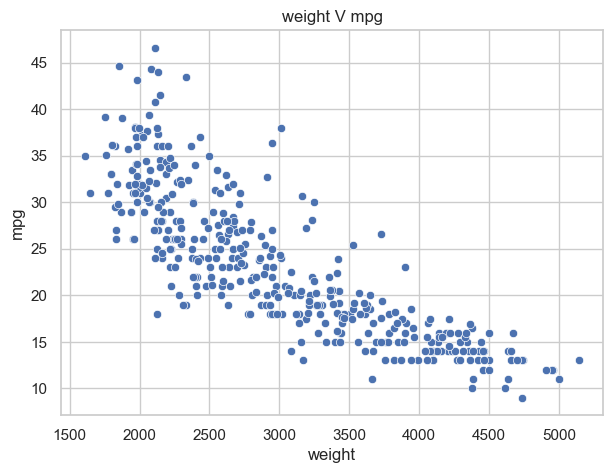

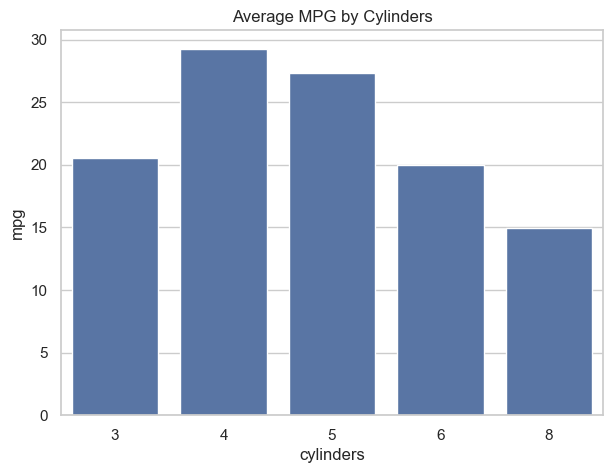

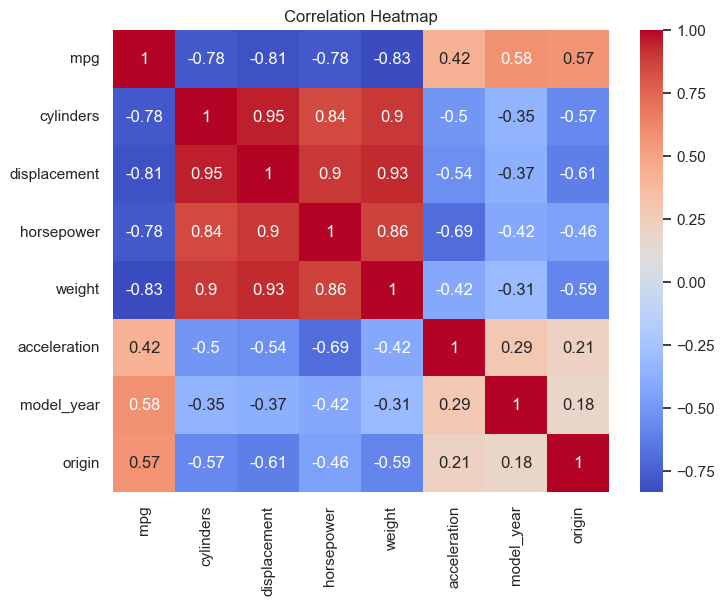

In [10]:
# =====================
# 📊 STEP 5: VISUALIZATIONS
# =====================

#scatter plot weight v mpg
plt.figure(figsize=(7,5))
sns.scatterplot(x="weight", y="mpg", data=df)
plt.title("weight V mpg")
plt.show()

# 2️⃣ Bar plot: Average MPG by Cylinders
plt.figure(figsize=(7,5))
sns.barplot(x='cylinders', y='mpg', data=df, estimator='mean', errorbar=None)
plt.title("Average MPG by Cylinders")
plt.show()

# 3️⃣ Heatmap: Correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [11]:
# =====================
# 🧠 STEP 6: INSIGHTS
# =====================

# Write your insights below 👇

print("""
✅ Insights Summary:
1. Heavier cars tend to have lower MPG.
2. Cars with more cylinders generally consume more fuel.
3. Higher horsepower usually results in lower fuel efficiency.
4. Modern model years (newer cars) show better fuel efficiency.
""")



✅ Insights Summary:
1. Heavier cars tend to have lower MPG.
2. Cars with more cylinders generally consume more fuel.
3. Higher horsepower usually results in lower fuel efficiency.
4. Modern model years (newer cars) show better fuel efficiency.



In [12]:
# =====================
# 💾 STEP 7: SAVE CLEAN DATA
# =====================

df.to_csv("clean_auto_mpg.csv", index=False)
print("Clean dataset saved as 'clean_auto_mpg.csv' ✅")


Clean dataset saved as 'clean_auto_mpg.csv' ✅
